# Rapper contingency tables

## Libraries, data, and things we did before
We fussed over this stuff in the previous notebook. Take a look at it if you're interested, but the following chunks are about loading in the data and using `mutate()` from `dplyr` to get what we want out of our data.

In [19]:
# * LIBRARIES
library(dplyr)
library(ggplot2)
library(broom)

# * LOAD IN DATA
rappers <- read.csv("../data/rappers.csv")

This chunk is adding in useful columns. *Don't worry about being able to write a function.*

In [20]:
# * DON'T WORRY ABOUT THIS PART :D
height_to_decimal <- function(this_height) {
    numeric <- sapply(strsplit(gsub("\"", "", as.character(this_height)), "\'"), as.numeric)
    numeric[1] + (numeric[2] / 12)
}
height_to_decimal <- Vectorize(height_to_decimal, vectorize.args="this_height")

# * WORRY ABOUT THIS PART
# * USING MUTATE TO ADD USEFUL VALUES
rappers <- rappers %>% mutate(height_decimal=as.numeric(height_to_decimal(height)))
rappers <- rappers %>% mutate(age=2019-birth_year,
                              active=2019-start_year)

head(rappers)

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal,age,active
Nicki-Minaj,Onika-Maraj,1982,New-York,75,2004,FALSE,"5'2""",5.166667,37,15
Jay-Z,Shawn-Carter,1969,New-York,900,1986,FALSE,"6'2""",6.166667,50,33
Eminem,Marshall-Mathers,1972,Missouri,190,1988,FALSE,"5'8""",5.666667,47,31
Kendrick-Lamar,Kendrick-Duckworth,1987,California,45,2003,FALSE,"5'6""",5.500000,32,16
Logic,Robert-Hall,1990,Maryland,10,2009,FALSE,"5'9""",5.750000,29,10
E-40,Earl-Stevens,1967,California,10,1986,FALSE,"6'1""",6.083333,52,33


## Working the categorical data

Here's where this topic really starts! In this section, we're going to be covering how to work with categorical data. Categorical data again are data that fall under characteristics rather than quantities. (Just as a self-check, INTERVALS of quantities are also categorical! Review this if this is fishy to you.)

I'm going to make a **contingency table** or a **two-way table** based off the following subset of just Californian and New York rappers.

In [17]:
library(dplyr)

In [25]:
cat_subset <- rappers %>% filter(origin %in% c("New-York", "California"))
cat_subset <- cat_subset %>% mutate(tall=height_decimal > mean(height_decimal))
cat_subset <- cat_subset %>% mutate(vet=active > mean(active))
cat_subset <- cat_subset %>% select(artist_name, origin, tall, vet)
head(cat_subset)

artist_name,origin,tall,vet
Nicki-Minaj,New-York,FALSE,FALSE
Jay-Z,New-York,TRUE,TRUE
Kendrick-Lamar,California,FALSE,FALSE
E-40,California,TRUE,TRUE
Nas,New-York,FALSE,TRUE
Jadakiss,New-York,FALSE,TRUE


Here's a **two-way table** about being a rap vet and where the rapper's origin is.

In [35]:
contingency_table <- table(as.character(cat_subset$origin), cat_subset$vet)
contingency_table

            
             FALSE TRUE
  California     6   10
  New-York      10   12

We can visualize categorical variables by making a **dodged bar plot**. Below is one that separates California and New York rappers, then further separates rappers who have been in the rap game for more years than the average from those who are more new to the game.

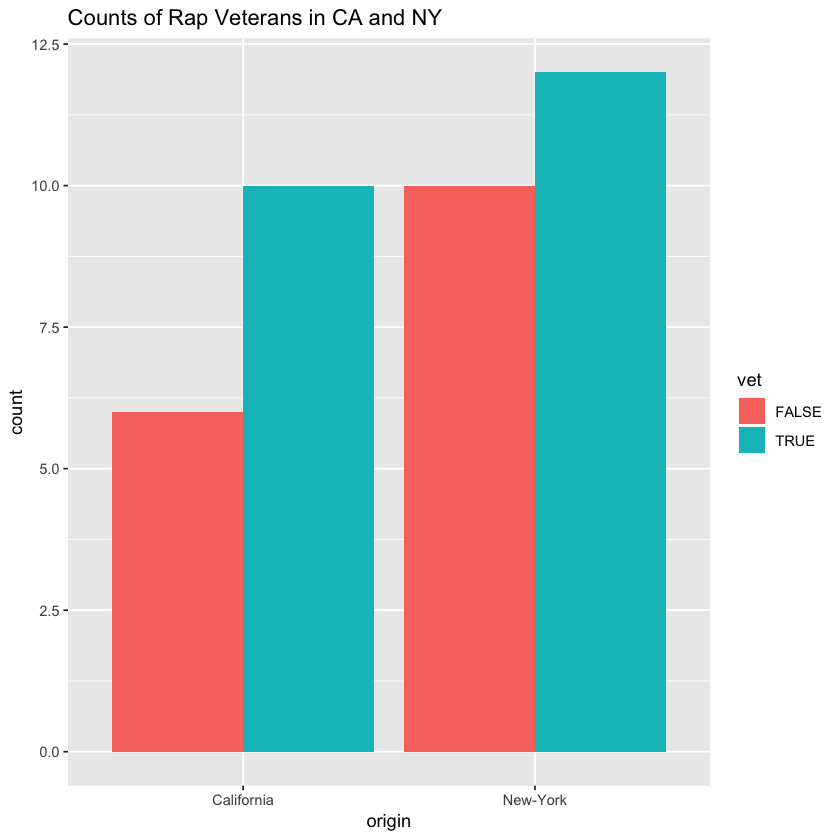

In [32]:
ggplot(cat_subset, aes(x=origin, fill=vet)) +
    geom_bar(position="dodge") +
    ggtitle("Counts of Rap Veterans in CA and NY")

The below plot takes the visualization a "step forward". It may not be the most understandable, but we now have added in counts for whether or not a rapper is tall. We use `facet_wrap()` to separate the two states as well. (Which is true geographically and I would definitely suppose historically as far as competitive nature goes.)

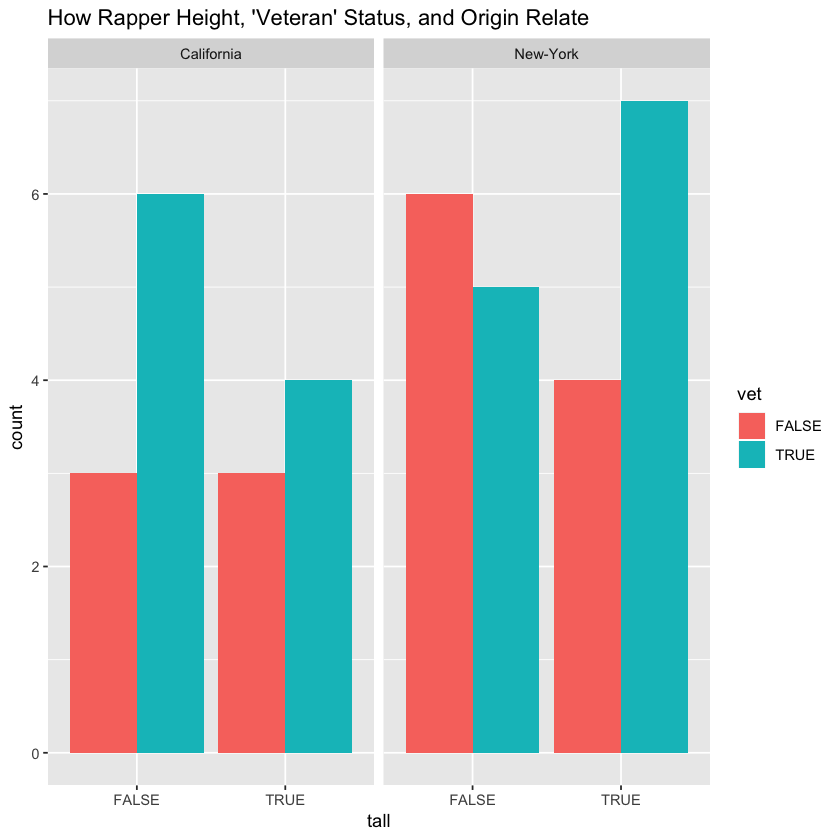

In [33]:
ggplot(cat_subset, aes(x=tall, fill=vet)) +
    geom_bar(position="dodge") +
    ggtitle("How Rapper Height, 'Veteran' Status, and Origin Relate") +
    facet_wrap(~origin)

## Calculating conditional probabilities


### 1. Calcuating $P(CA|True)$
What is the conditional probability of California given that the rapper is a veteran of rap (if you haven't read any of the above, this has been defined as the rapper has been active longer than the mean amount of active time)?

To answer this question, let's look at our contingency table.

In [36]:
contingency_table

            
             FALSE TRUE
  California     6   10
  New-York      10   12

1. First, since we are **given** that the person is a rap vet, we will look at the column that says "TRUE".
2. Next, we will look at the cell that has to do with California within that column.
3. The probability $P(CA|True)=10/(6+10)=10/16 \approx 0.63$.
4. For this dataset of rappers that was collected with an incalculable amount of bias, we can say that the probability that given a rapper is a "rap veteran", there is a 63% chance that the rapper is from California.

### 2. Calculating $P(Tall|NY)$
What is the conditional probability of a Tall given that a rapper is from New York? We can calculate this similarly, but we need to make a contingency table for that context.

In [37]:
contingency_table <- table(as.character(cat_subset$origin), cat_subset$tall)
contingency_table

            
             FALSE TRUE
  California     9    7
  New-York      11   11

Now that we have this contingency table, we can take a look at the column for "TRUE" which means they are truly tall in this case, then look at the cell that has to do with New York. Our probability ends up being:

$P(Tall|NY) = 11 / 22 = 1/2$

And since we calculated this value, we can use the **complement rule** to figure out $P(Short|NY) = 1 - P(Tall|NY) = 1/2$.

### 3. Calculating $P(CA|Tall,Vet)$
In order to calculate the probability given two pieces of information (tall and vet), we need to take a look at counts. Because we're working with three categorical variables, we can't look at just one contingency table anymore. The following is an extension of the contingency tables we were looking at before. 

In [52]:
counts_table <- data.frame(table(origin=as.character(cat_subset$origin), vet=cat_subset$vet, tall=cat_subset$tall))
names(counts_table)[4] <- "n"
counts_table <- counts_table %>% arrange(origin)
counts_table

origin,vet,tall,n
California,FALSE,FALSE,3
California,TRUE,FALSE,6
California,FALSE,TRUE,3
California,TRUE,TRUE,4
New-York,FALSE,FALSE,6
New-York,TRUE,FALSE,5
New-York,FALSE,TRUE,4
New-York,TRUE,TRUE,7


The column on the very right side corresponds to how many rappers fall under the same values for each category. Take a minute to inspect the table. It seems that there are not a lot of Californian non-veterans who are not tall, and there are a lot of New York veterans who are tall.

To get the probability of $P(CA|Tall,Vet)$, we can now think:

1. Take a look at the rows that have "TRUE" in the `tall` and `vet` columns.

In [54]:
counts_table %>% filter(vet==TRUE, tall==TRUE)

origin,vet,tall,n
California,TRUE,TRUE,4
New-York,TRUE,TRUE,7


2. Count up the total, which in this case is 11
3. Count up the number of rappers that have California as their origin which is 4
4. Divide to get $P(CA|Tall,Vet) = 4 / (4+7) = 4/11 \approx 0.363$

## Working backward
We won't always have the counts... for whatever reason... of our variables of interest. Sometimes, we will just have probabilities. We're about to switch gears. I'm going to make up some values.

Let $G$ be the event that a given rapper gets a grammy within the last five years. Let $P(G)=$, it being pretty darn rare. Remember now that our dataset has $n=75$ subjects (rappers). Now, let $P(Vet|G)=$ and $P(Vet'|G')=$.

### Calculating $P(G|Vet')$
Say we are interested in calculating the probability of getting a grammy given that a rapper is not a rap vet. We can start thinking in terms of a contingency table.

### Based on this table, gonna make problem above


|`     |   $Vet$    |    $Vet'$  |   Total   |
|------|------------|-------------|-----------|
| $G$  |      (2/3)*3 = 2      |     1        |     75 * (0.04) = 3      |
| $G'$ |      6     |      (11/12)*72 = 66      |        72  |
|Total |      37      |      38       |  $N=75$     |

Let $P(Vet'|G') = 11/12$ and $P(Vet|G) = 2/3$.